In [1]:
import pandas as pd

origin_data1 = pd.read_csv('data2/CGM1_dS&dSr.csv', encoding='cp949')
origin_data2 = pd.read_csv('data2/CGM2_dS&dSr.csv', encoding='cp949')
origin_data3 = pd.read_csv('data2/CGM3_dS&dSr.csv', encoding='cp949')
origin_data4 = pd.read_csv('data2/CGM4_dS&dSr.csv', encoding='cp949')
origin_data5 = pd.read_csv('data2/CGM5_dS&dSr.csv', encoding='cp949')

In [2]:
def filter_data(origin_data, columns):
    data = origin_data[columns]
    data = data[data["Glu(mg/dl)"] > 0]
    return data

common_var = ["Glu(mg/dl)", "LD1 Temp", "LD2 Temp", "LD3 Temp", "Rx1 Temp", "Rx2 Temp", "S1 T(C)", "S2 T(C)", "S3 T(C)", "FR Mon", "LD_Bias_Av",
             "mPD1_dS", "mPD2_dS", "mPD3_dS", "T-rPD_L1dS", "T-rPD_L2dS", "T-rPD_L3dS", "R-rPD_L1dS", "R-rPD_L2dS", "R-rPD_L3dS",
             "mPDdSr31", "mPDdSr32", "mPDdSr21", "T-rPDdSr31", "T-rPDdSr32", "T-rPDdSr21", "R-rPDdSr31", "R-rPDdSr32", "R-rPDdSr21"]


dataR1 = filter_data(origin_data1, common_var)
dataR2 = filter_data(origin_data2, common_var)
dataR3 = filter_data(origin_data3, common_var)
dataR4 = filter_data(origin_data4, common_var)
dataR5 = filter_data(origin_data5, common_var)

# dataC= pd.concat([dataR1, dataR2, dataR4, dataR5])

print(len(dataR1), len(dataR2), len(dataR3), len(dataR4), len(dataR5))

295 106 187 342 170


In [3]:
target_var1 = ["Glu(mg/dl)", "LD1 Temp", "LD2 Temp", "LD3 Temp", "Rx1 Temp", "Rx2 Temp", 
              "S1 T(C)", "S2 T(C)", "S3 T(C)", "FR Mon", "LD_Bias_Av"]

static_mean_list1 = []
static_std_list1 = []

data_list = [dataR1, dataR2, dataR3, dataR4, dataR5]
for d in data_list:
    std_list = []
    mean_list = []
    for var in target_var1:
        mean_list.append(d[var].mean())
        std_list.append(d[var].std())
    static_mean_list1.append(mean_list)
    static_std_list1.append(std_list)

static_mean_list1 = pd.DataFrame(static_mean_list1, columns=target_var1, index=["CGM1", "CGM2", "CGM3", "CGM4", "CGM5"])

## 
target_var2 = ["mPD1_dS", "mPD2_dS", "mPD3_dS", "T-rPD_L1dS", "T-rPD_L2dS", "T-rPD_L3dS", "R-rPD_L1dS", "R-rPD_L2dS", "R-rPD_L3dS"]

static_mean_list2 = []
static_std_list2 = []

for d in data_list:
    std_list = []
    mean_list = []
    for var in target_var2:
        mean_list.append(d[var].mean())
        std_list.append(d[var].std())
    static_mean_list2.append(mean_list)
    static_std_list2.append(std_list)

static_mean_list2 = pd.DataFrame(static_mean_list2, columns=target_var2, index=["CGM1", "CGM2", "CGM3", "CGM4", "CGM5"])

##
target_var3 = ["mPDdSr31", "mPDdSr32", "mPDdSr21", "T-rPDdSr31", "T-rPDdSr32", "T-rPDdSr21", 
               "R-rPDdSr31", "R-rPDdSr32", "R-rPDdSr21"]

static_mean_list3 = []
static_std_list3 = []

for d in data_list:
    std_list = []
    mean_list = []
    for var in target_var3:
        mean_list.append(d[var].mean())
        std_list.append(d[var].std())
    static_mean_list3.append(mean_list)
    static_std_list3.append(std_list)

static_mean_list3 = pd.DataFrame(static_mean_list3, columns=target_var3, index=["CGM1", "CGM2", "CGM3", "CGM4", "CGM5"])

static_mean_list1

,Glu(mg/dl),LD1 Temp,LD2 Temp,LD3 Temp,Rx1 Temp,Rx2 Temp,S1 T(C),S2 T(C),S3 T(C),FR Mon,LD_Bias_Av
CGM1,134.254237,27.118556,27.101715,27.232929,29.027953,27.496498,31.843919,33.228732,30.512153,1607.593435,29.790115
CGM2,115.273585,28.919151,28.904302,29.039528,31.363689,28.429349,30.767104,31.403226,27.816981,1637.675968,29.782991
CGM3,120.764706,26.488620,26.383727,26.886727,29.908497,26.411289,30.374706,31.402856,-95.793754,1647.874624,67.401460
CGM4,173.666667,28.695225,28.669947,28.799567,29.919567,28.515494,29.040509,30.525860,-95.728667,1587.436875,27.570898
CGM5,118.300000,24.880429,24.868271,25.020724,28.103218,24.904000,28.380535,30.264924,-95.658641,1650.391130,35.407018


In [4]:
static_mean_list2

,mPD1_dS,mPD2_dS,mPD3_dS,T-rPD_L1dS,T-rPD_L2dS,T-rPD_L3dS,R-rPD_L1dS,R-rPD_L2dS,R-rPD_L3dS
CGM1,370.277643,699.360723,738.400602,936.755817,518.642728,326.321215,176.129603,365.436255,584.553893
CGM2,368.615191,678.552726,740.090669,1156.497601,749.976925,499.585149,173.272402,361.366249,578.287058
CGM3,2110.463180,1673.907304,2015.751798,1473.667479,1166.444526,900.241850,1570.758383,1356.262324,1179.244393
CGM4,947.182786,230.125486,604.519600,968.696092,363.721668,212.695204,432.056303,298.191095,641.363760
CGM5,951.845858,366.347405,1122.817616,836.544600,334.369206,202.356537,422.494098,503.220271,1191.840263


In [5]:
static_mean_list3

,mPDdSr31,mPDdSr32,mPDdSr21,T-rPDdSr31,T-rPDdSr32,T-rPDdSr21,R-rPDdSr31,R-rPDdSr32,R-rPDdSr21
CGM1,1.994552,1.055980,1.889027,0.347407,0.628838,0.553049,3.319156,1.599679,2.075010
CGM2,2.007905,1.091734,1.840946,0.431873,0.665771,0.648929,3.337885,1.600385,2.085741
CGM3,0.955163,1.204361,0.793201,0.610911,0.771786,0.791551,0.750753,0.869490,0.863449
CGM4,0.638667,2.628593,0.243034,0.218042,0.576696,0.374296,1.486385,2.162457,0.689407
CGM5,1.179870,3.066200,0.385012,0.241775,0.605081,0.399742,2.821356,2.370209,1.191355


In [6]:
static_std_list1 = pd.DataFrame(static_std_list1, columns=target_var1, index=["CGM1", "CGM2", "CGM3", "CGM4", "CGM5"])
static_std_list1

,Glu(mg/dl),LD1 Temp,LD2 Temp,LD3 Temp,Rx1 Temp,Rx2 Temp,S1 T(C),S2 T(C),S3 T(C),FR Mon,LD_Bias_Av
CGM1,14.778401,0.232894,0.223662,0.233543,0.621936,0.763991,0.728866,0.351353,2.187216,10.979536,0.019166
CGM2,18.444528,0.014597,0.021625,0.024364,0.031627,0.140447,0.452108,0.557250,0.791098,11.255720,0.019527
CGM3,14.684431,0.021987,0.024114,0.025564,0.021060,0.022832,0.577406,0.529592,0.417050,2.132883,0.124283
CGM4,64.752993,0.011370,0.027023,0.019604,0.023551,0.025105,0.577487,0.431207,0.448433,40.874109,0.037163
CGM5,20.476527,0.013077,0.019717,0.024077,0.024221,0.025162,0.783322,0.561513,0.495989,5.884439,0.013006


In [7]:
static_std_list2 = pd.DataFrame(static_std_list2, columns=target_var2, index=["CGM1", "CGM2", "CGM3", "CGM4", "CGM5"])
static_std_list2

,mPD1_dS,mPD2_dS,mPD3_dS,T-rPD_L1dS,T-rPD_L2dS,T-rPD_L3dS,R-rPD_L1dS,R-rPD_L2dS,R-rPD_L3dS
CGM1,5.086249,8.762449,4.458383,89.606871,61.426139,42.215370,1.841292,2.559157,6.824627
CGM2,3.049918,21.825385,3.403893,71.821909,52.491565,43.277234,1.682265,3.461539,9.044649
CGM3,13.632184,17.992643,1.843283,9.512738,3.273892,17.225146,3.748311,4.227487,3.279430
CGM4,24.133681,5.797172,4.111072,115.624266,109.108757,86.186472,18.758680,28.602973,5.807780
CGM5,14.525250,7.349878,3.813236,22.410887,10.855001,9.483138,4.956299,14.103863,4.838827


In [24]:
static_std_list3 = pd.DataFrame(static_std_list3, columns=target_var2, index=["CGM1", "CGM2", "CGM3", "CGM4", "CGM5"])
static_std_list3

,mPD1_dS,mPD2_dS,mPD3_dS,T-rPD_L1dS,T-rPD_L2dS,T-rPD_L3dS,R-rPD_L1dS,R-rPD_L2dS,R-rPD_L3dS
CGM1,0.029647,0.014086,0.030944,0.016454,0.028618,0.027205,0.045933,0.021411,0.023634
CGM2,0.019986,0.033141,0.061393,0.024528,0.027161,0.031792,0.067999,0.027085,0.029046
CGM3,0.006300,0.013235,0.011597,0.012377,0.014779,0.004583,0.002700,0.003725,0.003293
CGM4,0.017754,0.069262,0.005959,0.088475,0.067438,0.108379,0.046595,0.125662,0.039477
CGM5,0.016794,0.065998,0.011280,0.005593,0.017488,0.009094,0.035548,0.064704,0.040090


In [8]:
static_minmax_list1 = []

for d in data_list:
    minmax_list = []
    for var in target_var1:
        max_num = d[var].max().round(2)
        min_num = d[var].min().round(2)
        range_num = str(min_num) + "~" + str(max_num)
        minmax_list.append(range_num)
    static_minmax_list1.append(minmax_list)

static_minmax_list1 = pd.DataFrame(static_minmax_list1, columns=target_var1, index=["CGM1", "CGM2", "CGM3", "CGM4", "CGM5"])

static_minmax_list1

,Glu(mg/dl),LD1 Temp,LD2 Temp,LD3 Temp,Rx1 Temp,Rx2 Temp,S1 T(C),S2 T(C),S3 T(C),FR Mon,LD_Bias_Av
CGM1,93~163,26.8~27.34,26.8~27.34,26.91~27.45,28.22~29.61,26.7~28.5,30.44~33.02,32.24~33.89,25.54~32.58,1590.18~1623.22,29.71~29.8
CGM2,95~152,28.92~28.97,28.86~28.92,29.02~29.08,31.33~31.39,28.24~28.66,29.51~31.78,29.98~32.42,26.33~29.02,1622.07~1658.77,29.72~29.8
CGM3,98~139,26.48~26.53,26.37~26.42,26.85~26.91,29.86~29.98,26.35~26.45,28.06~31.48,29.13~32.19,-96.7~-94.42,1643.93~1652.59,67.15~67.79
CGM4,94~290,28.64~28.75,28.64~28.7,28.75~28.86,29.86~29.98,28.45~28.55,25.68~30.34,27.16~31.23,-97.13~-94.42,1251.54~1650.76,27.5~27.6
CGM5,98~163,24.88~24.93,24.82~24.88,24.98~25.04,28.04~28.16,24.88~24.98,25.91~30.18,28.6~30.94,-96.7~-94.42,1641.57~1685.89,35.4~35.46


In [9]:
static_minmax_list2 = []

for d in data_list:
    minmax_list = []
    for var in target_var2:
        max_num = d[var].max().round(2)
        min_num = d[var].min().round(2)
        range_num = str(min_num) + "~" + str(max_num)
        minmax_list.append(range_num)
    static_minmax_list2.append(minmax_list)

static_minmax_list2 = pd.DataFrame(static_minmax_list2, columns=target_var2, index=["CGM1", "CGM2", "CGM3", "CGM4", "CGM5"])

static_minmax_list2

,mPD1_dS,mPD2_dS,mPD3_dS,T-rPD_L1dS,T-rPD_L2dS,T-rPD_L3dS,R-rPD_L1dS,R-rPD_L2dS,R-rPD_L3dS
CGM1,359.41~401.47,659.63~723.08,728.42~748.37,735.79~1062.21,424.05~642.62,259.83~392.6,171.33~180.78,358.77~372.51,570.69~601.7
CGM2,360.36~378.43,649.91~752.06,729.91~746.6,993.62~1309.62,593.67~845.04,361.29~573.01,170.62~178.64,351.94~367.45,560.38~593.58
CGM3,2081.19~2139.38,1652.09~1745.81,2010.22~2021.85,1452.93~1495.74,1157.73~1175.45,863.7~938.44,1559.19~1580.62,1342.66~1367.23,1167.0~1186.72
CGM4,838.38~1004.0,211.39~249.46,581.54~616.93,707.31~1184.31,248.73~1121.08,122.14~831.98,412.94~589.58,279.48~541.42,627.88~676.71
CGM5,900.71~979.03,342.83~385.63,1110.73~1132.09,743.81~872.88,312.0~363.93,165.87~220.32,413.07~439.79,477.48~553.07,1164.86~1208.63


In [10]:
static_minmax_list3 = []

for d in data_list:
    minmax_list = []
    for var in target_var3:
        max_num = d[var].max().round(2)
        min_num = d[var].min().round(2)
        range_num = str(min_num) + "~" + str(max_num)
        minmax_list.append(range_num)
    static_minmax_list3.append(minmax_list)

static_minmax_list3 = pd.DataFrame(static_minmax_list3, columns=target_var3, index=["CGM1", "CGM2", "CGM3", "CGM4", "CGM5"])

static_minmax_list3

,mPDdSr31,mPDdSr32,mPDdSr21,T-rPDdSr31,T-rPDdSr32,T-rPDdSr21,R-rPDdSr31,R-rPDdSr32,R-rPDdSr21
CGM1,1.85~2.07,1.01~1.12,1.74~1.98,0.32~0.4,0.56~0.7,0.51~0.68,3.2~3.44,1.54~1.67,2.01~2.17
CGM2,1.95~2.05,0.99~1.13,1.75~2.04,0.32~0.48,0.56~0.76,0.56~0.71,3.14~3.46,1.54~1.67,2.0~2.15
CGM3,0.94~0.97,1.15~1.22,0.78~0.84,0.58~0.64,0.74~0.81,0.78~0.8,0.74~0.76,0.86~0.88,0.85~0.87
CGM4,0.59~0.72,2.39~2.87,0.22~0.27,0.15~1.06,0.44~0.81,0.29~1.48,1.14~1.55,1.23~2.3,0.63~1.14
CGM5,1.15~1.24,2.92~3.27,0.36~0.42,0.22~0.25,0.52~0.63,0.38~0.46,2.69~2.91,2.16~2.49,1.1~1.32


In [11]:
target_var3 = ["Glu(mg/dl)",
               "R-rPDdSr31", "R-rPDdSr32", "R-rPDdSr21",
               "T-rPDdSr31", "T-rPDdSr32", "T-rPDdSr21",
               "R-rPD_L2dS", "T-rPD_L2dS", "T-rPD_L3dS"]
dataR1 = filter_data(origin_data1, target_var3)
dataR2 = filter_data(origin_data2, target_var3)
dataR4 = filter_data(origin_data4, target_var3)
dataR5 = filter_data(origin_data5, target_var3)

In [12]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

def preprocess(train_data, test_data) -> tuple:
    train_data = train_data.astype({'Glu(mg/dl)':'int'})
    test_data = test_data.astype({'Glu(mg/dl)':'int'})
    
    X_train = train_data.drop('Glu(mg/dl)', axis=1).values
    y_train = train_data['Glu(mg/dl)'].values
    y_train = y_train.round(0)
    
    X_test = test_data.drop('Glu(mg/dl)', axis=1).values
    y_test = test_data['Glu(mg/dl)'].values
    y_test = y_test.round(0)
    
    sum_data = pd.concat([train_data, test_data])
    sum_data = sum_data.drop('Glu(mg/dl)', axis=1).values
    
    scaler = StandardScaler()
    print(len(sum_data))
    scaler.fit(sum_data)
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    return torch.tensor(X_train, dtype=torch.float32), \
        torch.tensor(y_train, dtype=torch.float32), \
        torch.tensor(X_test, dtype=torch.float32), \
        torch.tensor(y_test, dtype=torch.float32)

dataC= pd.concat([dataR1, dataR2, dataR4])
datas = preprocess(dataC, dataR5)

913


In [13]:
datas[0][0:3]

tensor([[ 0.8990, -1.0493,  1.0442,  0.9416,  1.0758,  0.7881, -0.0690,  0.8396,
          0.9540],
        [ 0.9283, -1.0809,  1.0899,  0.9510,  1.1784,  0.7604, -0.0391,  0.8501,
          0.9925],
        [ 0.9037, -1.0948,  1.0789,  0.9378,  1.1884,  0.7417, -0.0391,  0.8201,
          0.9680]])

In [14]:
datas[2][0:3]

tensor([[ 0.1716,  1.3589, -0.4367, -0.5446, -1.6193, -0.0958,  1.5903, -0.7432,
         -0.9223],
        [ 0.2504,  1.1458, -0.3384, -0.7034, -1.4705, -0.3837,  1.8272, -0.8602,
         -0.9814],
        [ 0.2971,  0.9118, -0.2468, -0.7187, -1.3798, -0.4377,  2.0853, -0.8861,
         -0.9859]])

In [15]:
from torch import onnx

def train_model(model, train_loader, num_epochs, learning_rate, name:str):
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    model.to(device)
    epoch_losses = []
    for epoch in tqdm(range(num_epochs), desc=f'Train {name}'):
        total_loss = 0
        total_batches = 0
        for X, y in train_loader:
            X = X.to(device)
            y = y.to(device)
            with torch.set_grad_enabled(True):
                y_hat = model(X)
                loss = criterion(y_hat.squeeze(), y)
                total_loss += loss.item()
                total_batches += 1
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        epoch_loss = total_loss / total_batches
        epoch_losses.append(epoch_loss)
    
    torch.save(model.state_dict(), f'property2/{name}.pt')
    onnx.export(model, X.to(device), f'property2/{name}.onnx')
    return epoch_losses

In [16]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 8
num_epochs = 100
learning_rate = 0.001

train_loader = DataLoader(TensorDataset(datas[0].unsqueeze(1), datas[1]), batch_size=batch_size, shuffle=True)

In [17]:
from model import MLP, Conv1DModel, LinearRegressionModel

model_linear = LinearRegressionModel(9, 1, "sum")
losses_linear = train_model(model_linear, train_loader, num_epochs, learning_rate, 'linear')

model_conv = Conv1DModel(1, 2)
losses_conv1d = train_model(model_conv, train_loader, num_epochs, learning_rate, 'conv1d')

model_mlp = MLP(9)
losses_mlp = train_model(model_mlp, train_loader, num_epochs, learning_rate, 'mlp')

Train conv1d: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.29it/s]
C:\Work\CGM\ETRI_CGM_Analysis_ModelDev\JaeseongArea\model\_1d_conv_net.py:28: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  x = functional.avg_pool1d(x, kernel_size=int(x.size(dim=2)))
Train mlp: 100%|█████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.62it/s]


In [18]:
import numpy
from sklearn.metrics import mean_squared_error, r2_score

def model_infer(model, loder) -> tuple:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    y_pred = []
    y_true = []
    model.to(device)
    model.eval()
    with torch.no_grad():
        for X, y in loder:
            X = X.to(device)
            y = y.to(device)
            y_hat = model(X)
            y_pred.append(y_hat.cpu().numpy())
            y_true.append(y.cpu().numpy())
    y_pred = numpy.concatenate(y_pred)
    y_true = numpy.concatenate(y_true)
    rms = numpy.sqrt(mean_squared_error(y_true, y_pred.squeeze()))
    r2 = r2_score(y_true, y_pred.squeeze())
    return y_pred, y_true, rms, r2  

def append_graph(ax, y, y_pred, title):
    ax.scatter(y, y_pred, s=1, label=title)# 'MLP_L23'
    ax.plot([75, 300], [75, 300], 'k--')
    ax.set_xlabel('True')
    ax.set_ylabel('Pred')
    ax.set_title(f'{title} (RMS: {rms:.2f}, R2: {r2:.2f})')

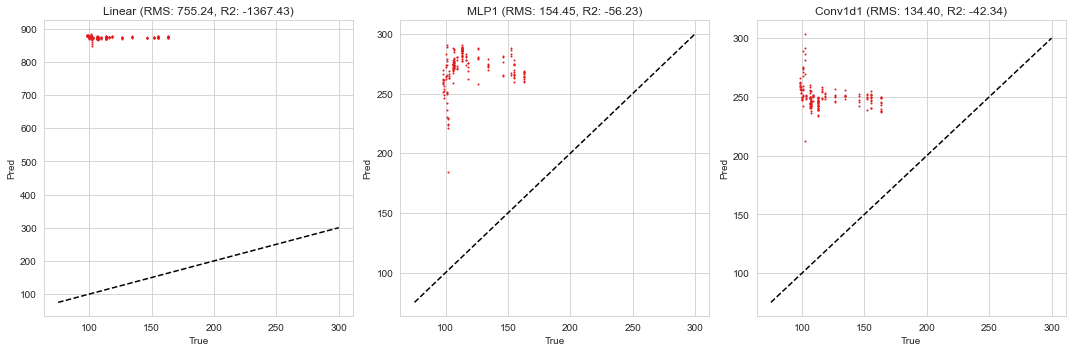

In [19]:
import numpy
import csv

import matplotlib.pyplot as plt
import seaborn as sns

test_loader = DataLoader(TensorDataset(datas[2].unsqueeze(1), datas[3]), batch_size=1, shuffle=True)

sns.set_style('whitegrid')
sns.set_palette('Set1')

fig, (ax1) = plt.subplots(1, 3, figsize=(15, 5))

y_pred_l, y_true_l, rms, r2 = model_infer(model_linear, test_loader)
append_graph(ax1[0], y_true_l, y_pred_l, 'Linear')
y_pred_m, y_true_m, rms, r2 = model_infer(model_mlp, test_loader)
append_graph(ax1[1], y_true_m, y_pred_m, 'MLP1')
y_pred_c, y_true_c, rms, r2 = model_infer(model_conv, test_loader)
append_graph(ax1[2], y_true_c, y_pred_c, 'Conv1d1')


plt.tight_layout()
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

RF = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=0)

In [21]:
def model_infer(model, loder) -> tuple:
    y_pred = []
    y_true = []

    for X, y in loder:
        y_hat = model.predict(X.squeeze(0).tolist()) # model(X)
        y_hat = torch.Tensor(y_hat)
        y_pred.append(y_hat.cpu().numpy())
        y_true.append(y.cpu().numpy())
        
    y_pred = numpy.concatenate(y_pred)
    y_true = numpy.concatenate(y_true)
    rms = numpy.sqrt(mean_squared_error(y_true, y_pred.squeeze()))
    r2 = r2_score(y_true, y_pred.squeeze())
    return y_pred, y_true, rms, r2

def draw_DTgraph(ax, model, loader, title):
    y_pred, y_true, rms, r2 = model_infer(model, loader)
    ax.scatter(y_true, y_pred, s=1, label=title)
    ax.plot([75, 300], [75, 300], 'k--')
    ax.set_xlabel('True')
    ax.set_ylabel('Pred')
    ax.set_title(f'{title} (RMS: {rms:.2f}, R2: {r2:.2f})') # f'R31 RandomForest (RMS: {rms:.2f}, R2: {r2:.2f})'

In [22]:
num_epochs = 3

for epoch in tqdm(range(num_epochs), desc=f'Train {str}'):
    RF.fit(datas[0], datas[1])

Train <class 'str'>: 100%|███████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.11it/s]


0.0


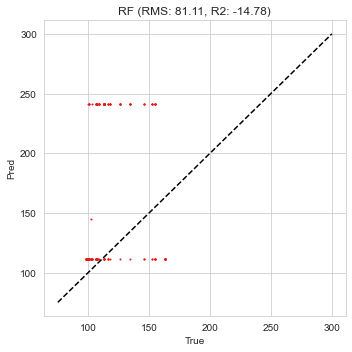

In [23]:
print(RF.score(datas[2], datas[3]))

fig, (ax1) = plt.subplots(1, 1, figsize=(5, 5))
draw_DTgraph(ax1, RF, test_loader, 'RF')

plt.tight_layout()
plt.show()